<a href="https://colab.research.google.com/github/basartimucin/MPA-MLF/blob/main/Week1_Lab_03_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM for classification

Load IRIS dataset, check its contents:


In [3]:
from sklearn.datasets import load_iris
import numpy as np
iris=load_iris()
print("Iris Matrix:\n", iris.data[0:10,:])
print("\nIris Matrix size:\n",iris.data.shape)
print("\nIris Target:\n", iris.target)
print("\nIris Array length:\n",len(iris.target))
print("\nIris Features:\n",iris.feature_names)

Iris Matrix:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

Iris Matrix size:
 (150, 4)

Iris Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

Iris Array length:
 150

Iris Features:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Split data into training and testing parts:

In [4]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
#Function for making test datasets randomly splits with given ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print("Dimensions of data: ", X_train.shape)
print("Dimensions of test data: " , X_test.shape)

Dimensions of data:  (120, 4)
Dimensions of test data:  (30, 4)


Use a Support Vector Machine for classification:


In [5]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

1.0

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [6]:
iris_subset = iris.data[:, :2]
sub_indices = iris.target != 2
X_subset = iris_subset[sub_indices]
y_subset = iris.target[sub_indices]

print("Dimensions of data subset: ", X_subset.shape)
print("Subset (ex. from 0 to 5) \n", X_subset[:5,:])
print("\nDimensions of target subset: ", y_subset.shape)
print("Subset (ex. last 5 elements): ", y_subset[-5:])

Dimensions of data subset:  (100, 2)
Subset (ex. from 0 to 5) 
 [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]

Dimensions of target subset:  (100,)
Subset (ex. last 5 elements):  [1 1 1 1 1]


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

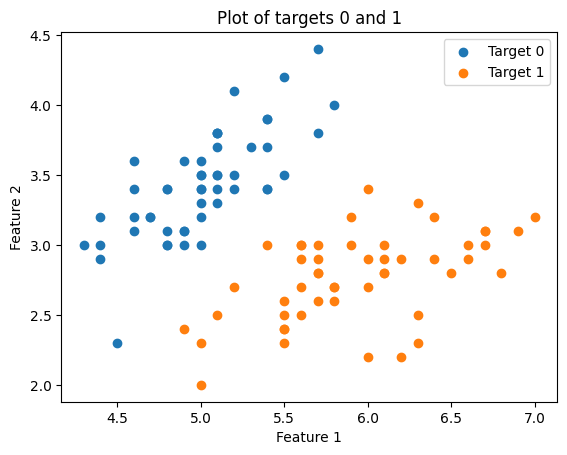

In [7]:
import matplotlib.pyplot as plt


plt.scatter(X_subset[y_subset == 0][:, 0], X_subset[y_subset == 0][:, 1], label='Target 0')
plt.scatter(X_subset[y_subset == 1][:, 0], X_subset[y_subset == 1][:, 1], label='Target 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Plot of targets 0 and 1')
plt.legend()
plt.show()

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [8]:
X_subset_train, X_subset_test, y_subset_train, y_subset_test = train_test_split(X_subset,y_subset,test_size=0.2)
c_value = 200
SVMmodel=SVC(kernel='linear',C = c_value)
SVMmodel.fit(X_subset_train,y_subset_train)
SVMmodel.get_params()
SVMmodel.score(X_subset_test,y_subset_test)

1.0

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

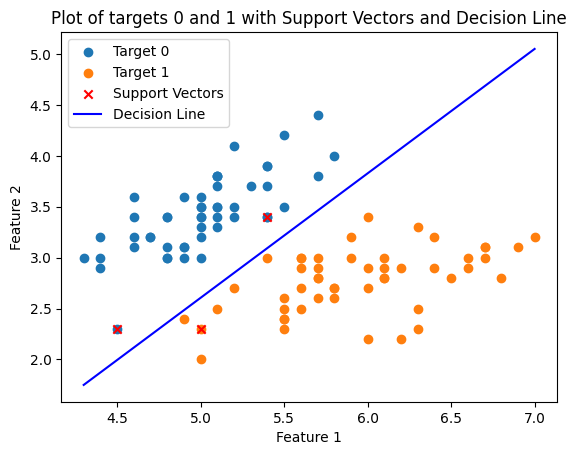

In [9]:

plt.scatter(X_subset[y_subset == 0][:, 0], X_subset[y_subset == 0][:, 1], label='Target 0')
plt.scatter(X_subset[y_subset == 1][:, 0], X_subset[y_subset == 1][:, 1], label='Target 1')

plt.scatter(SVMmodel.support_vectors_[:, 0], SVMmodel.support_vectors_[:, 1], color='red', marker='x', label='Support Vectors')

# Plotting the decision line
W = SVMmodel.coef_[0]
b = SVMmodel.intercept_
x0 = np.linspace(np.min(X_subset[:, 0]), np.max(X_subset[:, 0]), 100)
x1 = -(W[0] * x0 + b) / W[1]
plt.plot(x0, x1, color='blue', linestyle='-', label='Decision Line')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Plot of targets 0 and 1 with Support Vectors and Decision Line')
plt.legend()
plt.show()


# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

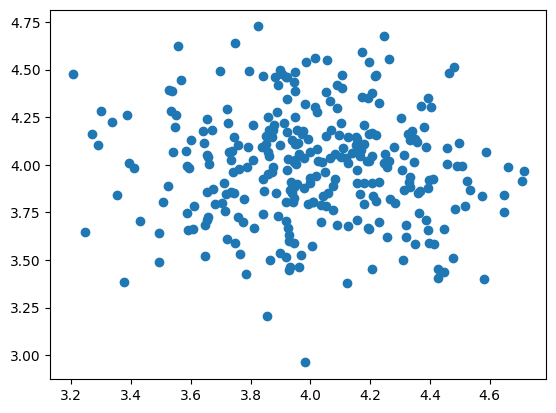

In [10]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

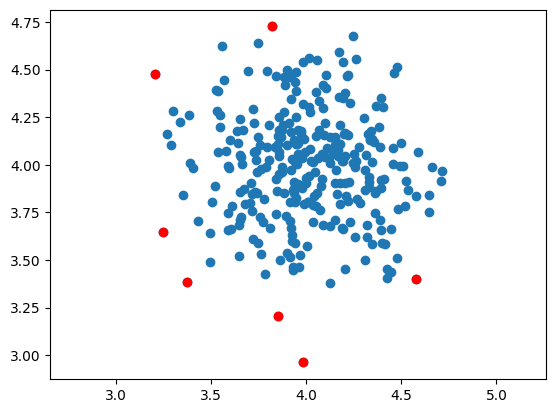

In [11]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

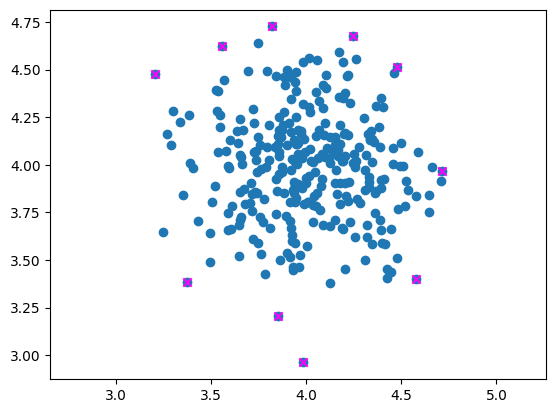

In [13]:
plt.scatter(x[:,0], x[:,1])

# Plotting the support vectors
supvectors2 = SVMmodelOne.support_vectors_
plt.scatter(supvectors2[:,0], supvectors2[:,1], color='magenta', marker='x')

plt.axis('equal')
plt.show()

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

[8.99063465 8.99300428 8.99290219 8.99308932 8.99287725 8.99224546
 8.99192747 8.99093982 8.99123656 8.99346251 8.99378065 8.99326896
 8.98852384 8.99139379 8.9928401  8.99303212 8.99279775 8.99360495
 8.99153804 8.99216588 8.99369654 8.99307517 8.98938572 8.99373321
 8.99312613 8.993204   8.9886044  8.99191563 8.9912315  8.99282795
 8.99155749 8.98905544 8.98932157 8.99216386 8.99362614 8.99228798
 8.99332084 8.98864981 8.99184555 8.9907517  8.99073853 8.99349831
 8.99120572 8.99150869 8.9891849  8.99319776 8.99364556 8.99263301
 8.99063551 8.99328656 8.99077771 8.99325037 8.98948146 8.99382188
 8.99331469 8.99362908 8.99344805 8.99309958 8.99166357 8.9937667
 8.99339348 8.99037862 8.99379894 8.99268343 8.99259732 8.99357067
 8.99330268 8.99380425 8.99187829 8.99053004 8.99337305 8.99378421
 8.99365311 8.99367899 8.99079662 8.99110855 8.99199232 8.993301
 8.98655785 8.98868771 8.99202058 8.99071631 8.99292504 8.99224956
 8.99347651 8.99355912 8.99362714 8.99345812 8.99058193 8.9925636

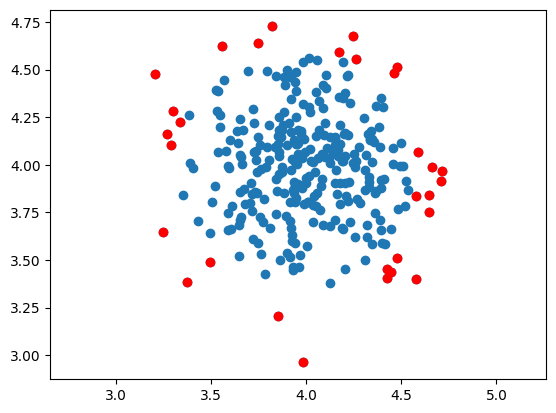

In [15]:
scores = SVMmodelOne.score_samples(x)
print(scores)

thresh = quantile(scores, 0.1)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()